In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
import seaborn as sns

ApplicationDate: Дата подачи заявки на кредит

Age: Возраст заявителя

AnnualIncome: Годовой доход

CreditScore: Оценка кредитоспособности

LoanAmount: Запрашиваемая сумма кредита

LoanDuration: Срок погашения кредита

MaritalStatus: Семейное положение заявителя

NumberOfDependents: Количество иждивенцев

HomeOwnershipStatus: Статус владения жильем

MonthlyDebtPayments: Ежемесячные обязательства по долгам

CreditCardUtilizationRate: Процент использования кредитной карты

NumberOfOpenCreditLines: Активные кредитные линии

NumberOfCreditInquiries: Количество запросов на кредит

DebtToIncomeRatio: Соотношение долга к доходу

BankruptcyHistory: История банкротств

LoanPurpose: Цель кредита

PreviousLoanDefaults: Предыдущие дефолты по кредитам

PaymentHistory: История платежей

LengthOfCreditHistory: Длительность кредитной истории

SavingsAccountBalance: Баланс сберегательного счета

CheckingAccountBalance: Баланс расчетного счета

TotalAssets: Общая стоимость активов

TotalLiabilities: Общая сумма обязательств

MonthlyIncome: Ежемесячный доход

UtilityBillsPaymentHistory: История платежей по коммунальным услугам

JobTenure: Длительность работы на текущем месте

EmploymentStatus: Статус занятости

EducationLevel: Уровень образования

Experience: Опыт работы

NetWorth: Чистая стоимость активов

BaseInterestRate: Базовая процентная ставка

InterestRate: Применяемая процентная ставка

MonthlyLoanPayment: Ежемесячный платеж по кредиту

TotalDebtToIncomeRatio: Общее соотношение долга к доходу

LoanApproved: Статус одобрения кредита

RiskScore: Оценка риска

In [2]:
df = pd.read_csv("/kaggle/input/train-ds/train.csv")
df

string_columns = df.apply(lambda x: x.apply(lambda y: isinstance(y, str)).any())
print("\nСтолбцы с строковыми значениями:")
print(string_columns[string_columns].index.tolist())


Столбцы с строковыми значениями:
['ApplicationDate', 'MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose', 'EmploymentStatus', 'EducationLevel']


In [3]:
df_one_hot = pd.get_dummies(df, columns=['MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose', 'EmploymentStatus', 'EducationLevel'], drop_first=True)
df_one_hot

,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,LoanPurpose_Debt Consolidation,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,EmploymentStatus_Self-Employed,EmploymentStatus_Unemployed,EducationLevel_Bachelor,EducationLevel_Doctorate,EducationLevel_High School,EducationLevel_Master
0,2010-06-26,27.0,66829.0,549.0,17290.0,60.0,1.0,1095.0,0.151985,2.0,...,False,True,False,False,False,False,False,False,False,False
1,1996-09-23,55.0,172147.0,850.0,16110.0,36.0,1.0,211.0,0.175693,3.0,...,False,False,True,False,False,False,False,False,True,False
2,2015-01-19,51.0,300000.0,850.0,38436.0,36.0,0.0,546.0,0.444605,3.0,...,False,True,False,False,False,False,True,False,False,False
3,1981-05-12,25.0,34683.0,847.0,19186.0,48.0,0.0,153.0,0.188452,7.0,...,True,False,False,False,False,False,False,False,True,False
4,1995-05-07,55.0,300000.0,850.0,30437.0,48.0,2.0,562.0,0.273431,3.0,...,True,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11012,2010-07-10,57.0,300000.0,850.0,14756.0,48.0,2.0,620.0,0.477742,1.0,...,False,True,False,False,False,False,False,False,False,False
11013,2003-10-22,28.0,15000.0,300.0,51361.0,96.0,1.0,696.0,0.322554,2.0,...,False,False,True,False,False,False,True,False,False,False
11014,1983-05-12,23.0,15000.0,302.0,30724.0,72.0,3.0,413.0,0.497062,2.0,...,False,True,False,False,True,False,False,False,False,False
11015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False


In [4]:
df_drop_date = df_one_hot.drop(columns=['ApplicationDate'])

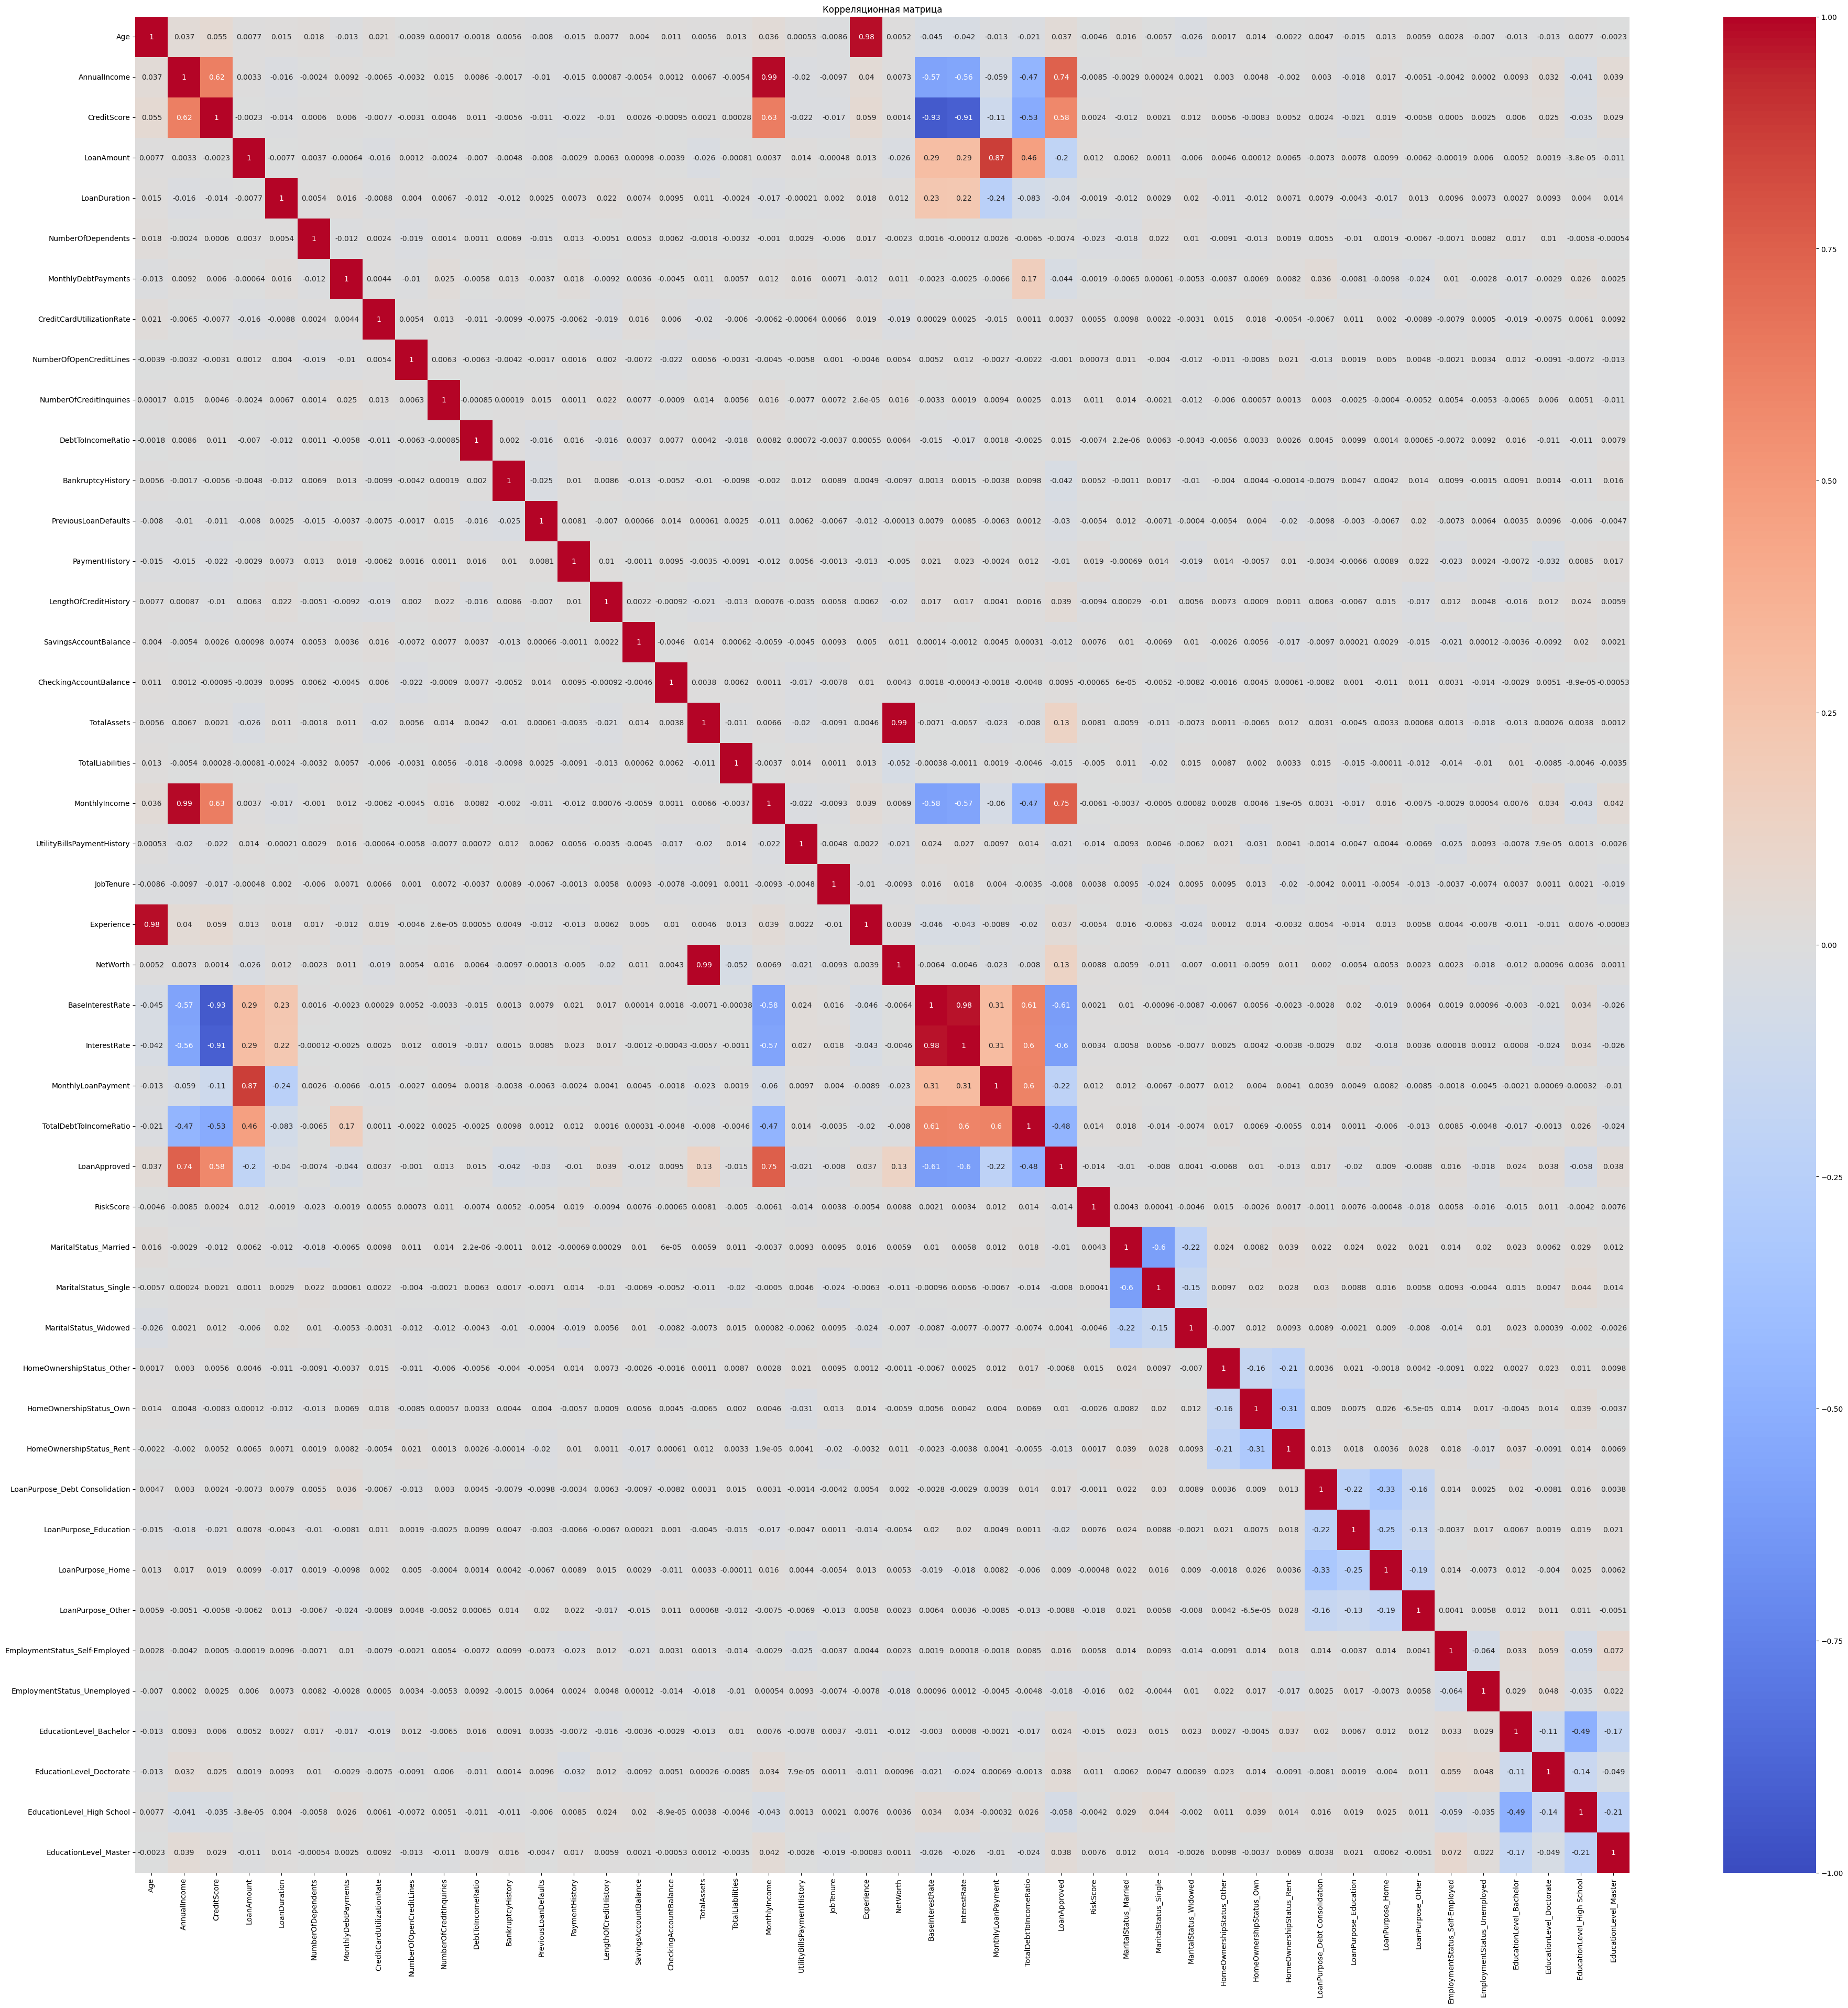

In [5]:
corr_matrix = df_drop_date.corr()

plt.figure(figsize=(df_drop_date.shape[1], df_drop_date.shape[1]))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Корреляционная матрица")
plt.show()

По матрице корреляции видно, что некоторые признаки сильно зависят друг от друга. Это надо бы исправить.

Возраст и опыт

Годовой доход и месячный доход

Общая сумма кредита и ежемесячные выплаты

Общая стоимость активов и чистая стоимость активов

BaseInterestRate и Credit score

InterestRate и BaseInterestRate

InterestRate и Credit score

Monthly Income и loan approved

In [6]:
df = df_drop_date.dropna()

In [7]:
df = df.drop_duplicates()

In [8]:
df = df.drop(columns=['Experience'])

In [9]:
df = df.drop(columns=['AnnualIncome'])

In [10]:
df = df.drop(columns=['LoanAmount'])

In [11]:
df = df.drop(columns=['NetWorth'])

In [12]:
df = df.drop(columns=['BaseInterestRate'])

In [13]:
df = df.drop(columns=['InterestRate'])

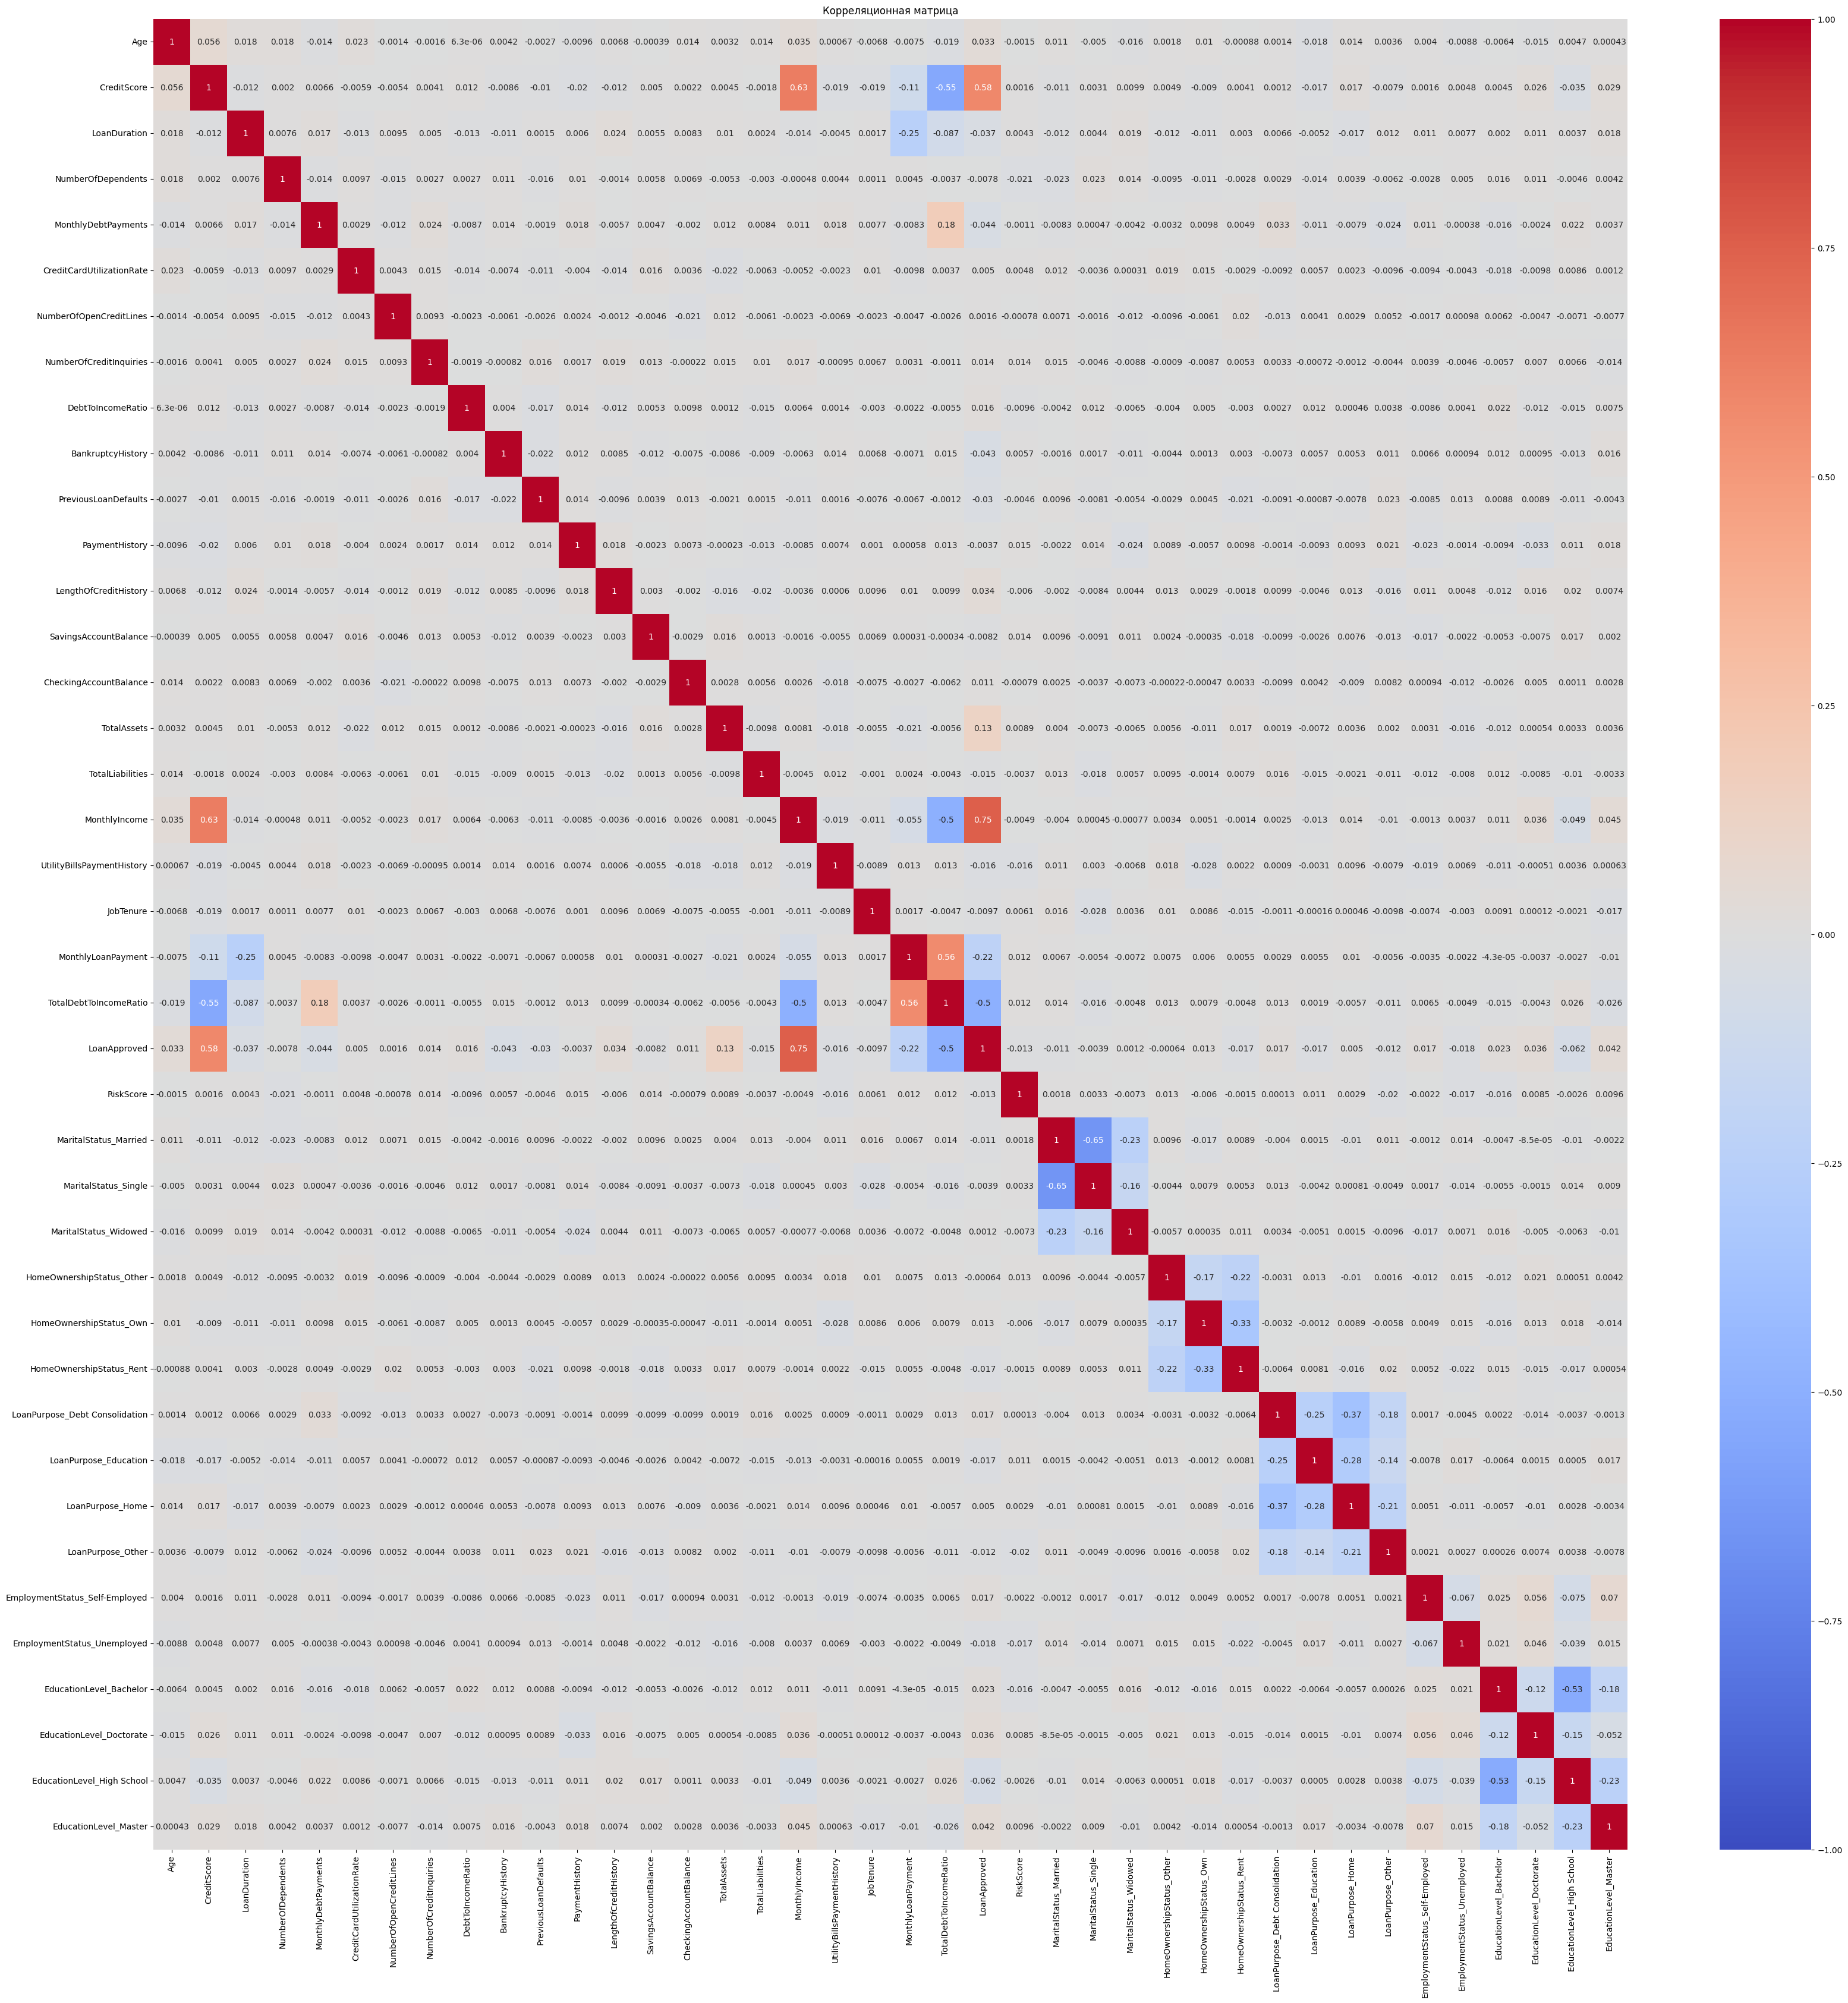

In [14]:
corr_matrix = df.corr()

plt.figure(figsize=(df.shape[1], df.shape[1]))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Корреляционная матрица")
plt.show()

In [15]:
description = df.describe()
description

,Age,CreditScore,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,DebtToIncomeRatio,BankruptcyHistory,...,CheckingAccountBalance,TotalAssets,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,9529.000000,9529.000000,9529.000000,9529.000000,9529.000000,9529.000000,9529.000000,9529.000000,9529.000000,9529.000000,...,9529.000000,9.529000e+03,9.529000e+03,9529.000000,9529.000000,9529.000000,9529.000000,9529.000000,9529.000000,9.529000e+03
mean,39.875223,678.223318,53.418827,1.568265,547.004093,0.284779,3.034841,0.981320,0.250427,0.052157,...,1981.965159,1.822949e+05,6.878936e+04,10842.082135,0.783746,4.948368,1068.863223,0.510345,0.513275,-3.458380e+04
std,11.595208,175.036220,24.393468,1.419023,502.780983,0.159266,1.740828,0.990333,0.144648,0.222354,...,3021.471885,4.624953e+05,2.025591e+05,9383.125417,0.123648,2.205838,1301.572948,0.843369,0.499850,1.437496e+06
min,18.000000,300.000000,12.000000,0.000000,13.000000,0.003674,0.000000,0.000000,0.003227,0.000000,...,16.000000,8.920000e+02,7.800000e+01,1250.000000,0.259301,0.000000,30.008506,0.006064,0.000000,-9.999999e+06
25%,32.000000,550.000000,36.000000,0.000000,234.000000,0.159134,2.000000,0.000000,0.138390,0.000000,...,532.000000,2.311100e+04,8.037000e+03,1711.333333,0.707136,3.000000,374.710650,0.066347,0.000000,3.249476e+01
50%,40.000000,723.000000,48.000000,1.000000,399.000000,0.263013,3.000000,1.000000,0.228363,0.000000,...,1123.000000,6.095100e+04,2.266300e+04,7371.250000,0.803587,5.000000,684.613633,0.177859,1.000000,4.401980e+01
75%,48.000000,850.000000,60.000000,3.000000,687.000000,0.392255,4.000000,2.000000,0.340925,0.000000,...,2297.000000,1.614410e+05,6.021600e+04,21273.666667,0.878992,6.000000,1279.858303,0.638523,1.000000,6.526522e+01
max,80.000000,850.000000,120.000000,6.000000,10879.000000,0.914635,12.000000,6.000000,0.865842,1.000000,...,109245.000000,1.128946e+07,8.997054e+06,25000.000000,0.996573,17.000000,29634.807816,24.383046,1.000000,1.000000e+07


In [16]:
df = df[df['RiskScore'] >= 0]

In [17]:
df = df[df['RiskScore'] <= 100]

In [18]:
df = df[df['TotalAssets'] <= 1000000]
df.shape[0]

9054

In [19]:
df = df[df['TotalAssets'] >= 5000]
df.shape[0]

8837

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [21]:
Y = df['RiskScore']
X = df.drop(columns='RiskScore')

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [23]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [25]:
param_grid = {'alpha': [0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 1.0, 10.0, 100.0]}
grid_search = GridSearchCV(Ridge(), param_grid, cv=5)
grid_search.fit(X, Y)
print("Лучшие параметры:", grid_search.best_params_)
print("Лучший R^2:", grid_search.best_score_)


ridge = Ridge(alpha=0.3)  # alpha - параметр регуляризации
ridge.fit(X_train_scaled, y_train)

Лучшие параметры: {'alpha': 0.3}
Лучший R^2: 0.942087971636645


Ridge(alpha=0.3)

In [26]:
y_pred = ridge.predict(X_test_scaled)

In [27]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Squared Error: 18.19530364059361
Mean Absolute Error: 3.360910235368293


Предсказываем значения для test.csv

In [28]:
test = pd.read_csv("/kaggle/input/test-ds/test.csv")

In [29]:
test = test.drop(columns=['ID'])
test = test.drop(columns=['ApplicationDate'])
test = test.drop(columns=['Experience'])
test = test.drop(columns=['AnnualIncome'])
test = test.drop(columns=['LoanAmount'])
test = test.drop(columns=['NetWorth'])
test = test.drop(columns=['InterestRate'])
test = test.drop(columns=['BaseInterestRate'])

test.shape[1]

28

In [30]:
df_one_hot_test = pd.get_dummies(test, columns=['MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose', 'EmploymentStatus', 'EducationLevel'], drop_first=True)

In [31]:
unique_elements = set(df.columns.to_list()).symmetric_difference(set(df_one_hot_test.columns.to_list()))

unique_elements_list = list(unique_elements)
print(unique_elements_list)

['RiskScore']


In [32]:
test_scaled = scaler.fit_transform(df_one_hot_test)
test_PRED = ridge.predict(test_scaled)
test_PRED

array([33.23024841, 57.45987508, 30.68149135, ..., 62.64536816,
       52.59634239, 80.61695995])

In [33]:
ids = np.arange(test_PRED.shape[0]).reshape(-1, 1)

data_reshaped = test_PRED.reshape(-1, 1)

data_with_ids = np.hstack((ids, data_reshaped))

df_out = pd.DataFrame(data_with_ids, columns=['ID', 'RiskScore'])

df_out.to_csv('submission.csv', index=False)